In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Loading clean data

In [2]:
df = pd.read_csv('../data/clean_storm_data/clean_weather_data.csv').drop(columns='index')

In [3]:
df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE
0,200001,6,426,200001,6,1000,1090286,5128354,CALIFORNIA,6.0,...,LAKE ARROWHEAD,0.0,No direction,LAKE ARROWHEAD,0.0,0.0,0.0,0.0,Santa Ana winds blew over four semi-tractor tr...,No entry
1,200002,19,1300,200002,19,1700,1091802,5132270,SOUTH DAKOTA,46.0,...,KENNEBEC,0.0,No direction,LOWER BRULE,0.0,0.0,0.0,0.0,"Due to the extremely dry and windy conditions,...",No entry
2,200003,16,1430,200003,16,2030,1091257,5132491,FLORIDA,12.0,...,LA BELLE,0.0,No direction,LA BELLE,0.0,0.0,0.0,0.0,No entry,A wildfire of unknown acreage caused evacuatio...
3,200003,14,1000,200003,18,1000,1092071,5134291,PUERTO RICO,99.0,...,CENTRAL PORTION,0.0,No direction,CENTRAL PORTION,0.0,0.0,0.0,0.0,"An man made fire on March 14, near the Maricao...",No entry
4,200002,2,1200,200002,2,1730,1091747,5134633,CALIFORNIA,6.0,...,PAUMA VLY,0.0,No direction,PAUMA VLY,0.0,0.0,0.0,0.0,200 firefighters and 2 helicopters fought a br...,No entry


In [4]:
df['EVENT_TYPE'].value_counts()

drought      50312
tornado      28382
wildfire      6655
hurricane     1259
Name: EVENT_TYPE, dtype: int64

## Additional Cleaning

1. Dropping: any data points with HAWAII, AMERICAN SAMOA, VIRGIN ISLANDS, PUERTO RICO, and GUAM. 
2. drop the hurricane in nevada
3. Correct the fips column

In [5]:
index_hawaii = df[df['STATE']=='HAWAII'].index
index_as = df[df['STATE']=='AMERICAN SAMOA'].index
index_pr = df[df['STATE']=='PUERTO RICO'].index
index_vi = df[df['STATE']=='VIRGIN ISLANDS'].index
index_guam = df[df['STATE']=='GUAM'].index

In [6]:
df.drop(index_hawaii, inplace= True)
df.drop(index_as, inplace = True)
df.drop(index_pr, inplace = True)
df.drop(index_vi, inplace = True)
df.drop(index_guam, inplace = True)

In [55]:
index_nevada_hurricane = df[(df['STATE']== 'NEVADA') & (df['EVENT_TYPE'] == 'hurricane')].index

In [56]:
df.drop(index_nevada_hurricane, inplace = True)

In [57]:
df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH',
       'TOR_WIDTH', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS',
       'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION',
       'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON',
       'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE'],
      dtype='object')

In [62]:
df['fips'] = df['STATE_FIPS'].map(lambda x : int(x)*1000) + df['CZ_FIPS']

In [77]:
fips = pd.read_csv('../data/fips_codes/fips_lats_cities.csv').drop(columns=['zip','city','state','county_name', 'state_name'])
fips.drop_duplicates(inplace=True)
fips.head()

,fips,latitude,longitude
0,1001,32.536667,-86.648333
13,1003,30.733056,-87.720278
41,1005,31.865833,-85.396111
50,1007,32.997778,-87.126389
64,1009,33.966667,-86.583333


In [79]:
df = pd.merge(df, fips, on=['fips', 'fips'])

In [80]:
df[['STATE','CZ_NAME','STATE_FIPS', 'CZ_FIPS', 'fips', 'latitude','longitude']]

,STATE,CZ_NAME,STATE_FIPS,CZ_FIPS,fips,latitude,longitude
0,CALIFORNIA,SAN BERNARDINO,6.0,71,6071,34.83,-116.19
1,CALIFORNIA,SAN BERNARDINO,6.0,71,6071,34.83,-116.19
2,CALIFORNIA,SAN BERNARDINO,6.0,71,6071,34.83,-116.19
3,CALIFORNIA,SAN BERNARDINO,6.0,71,6071,34.83,-116.19
4,CALIFORNIA,SAN BERNARDINO,6.0,71,6071,34.83,-116.19
...,...,...,...,...,...,...,...
54701,KENTUCKY,MCCREARY,21.0,147,21147,36.74,-84.48
54702,KENTUCKY,ROBERTSON,21.0,201,21201,38.51,-84.05
54703,INDIANA,OHIO,18.0,115,18115,38.95,-84.97
54704,INDIANA,OHIO,18.0,115,18115,38.95,-84.97


# Wildfire data

In [81]:
wildfire_df = df[df['EVENT_TYPE']=='wildfire'].copy()

In [82]:
wildfire_df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH',
       'TOR_WIDTH', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS',
       'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION',
       'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON',
       'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'fips',
       'latitude', 'longitude'],
      dtype='object')

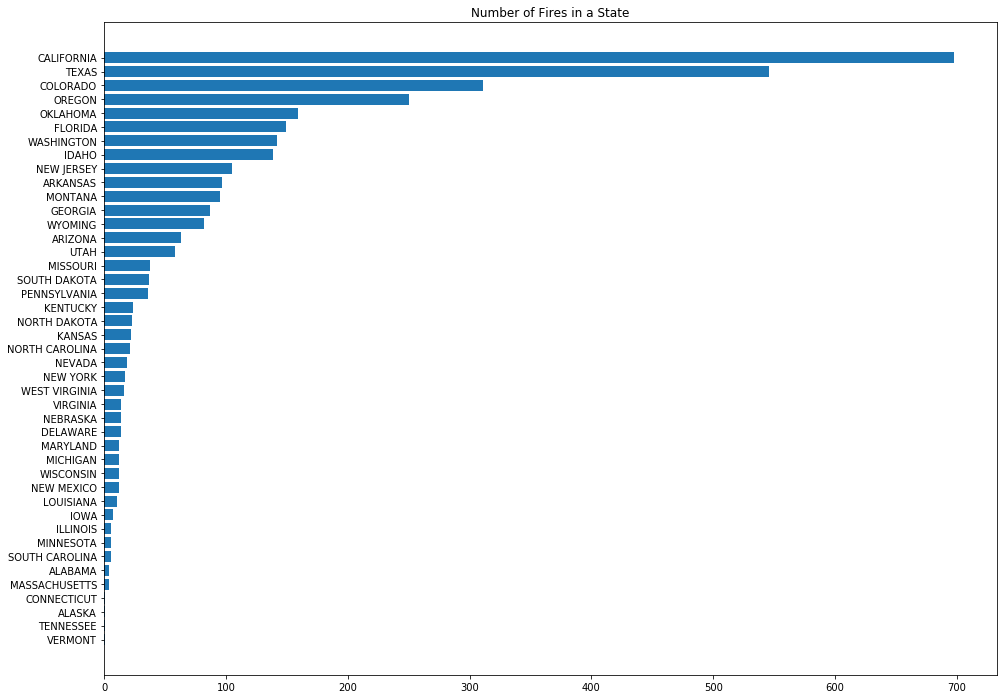

In [83]:
states = wildfire_df['STATE'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(states.index, states.values)
plt.title('Number of Fires in a State');

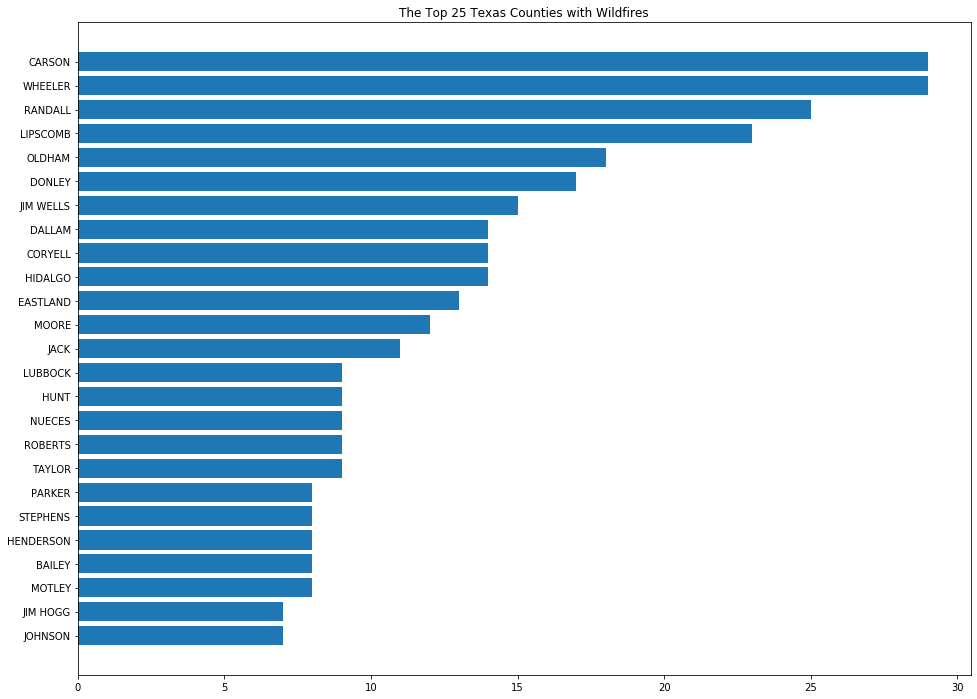

In [84]:
texas_counties = wildfire_df.loc[df['STATE']=='TEXAS','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(texas_counties.index[-25:], texas_counties.values[-25:])
plt.title('The Top 25 Texas Counties with Wildfires');

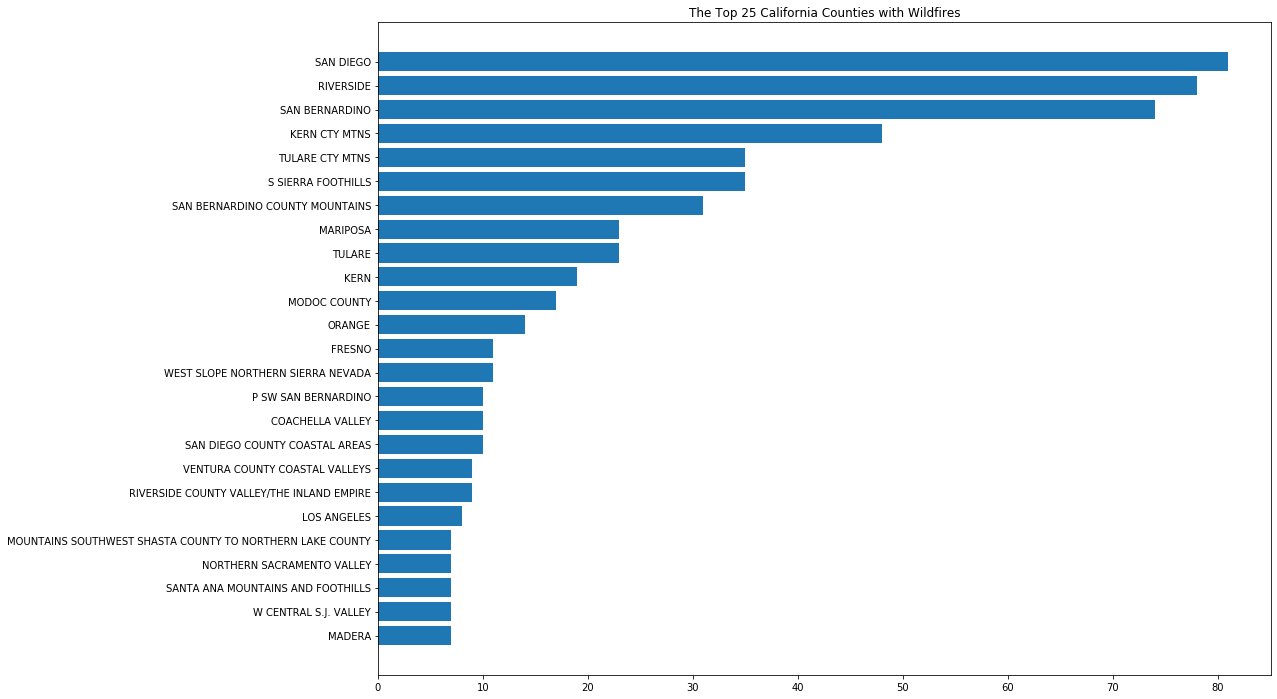

In [85]:
cal_counties = wildfire_df.loc[df['STATE']=='CALIFORNIA','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(cal_counties.index[-25:], cal_counties.values[-25:])
plt.title('The Top 25 California Counties with Wildfires');

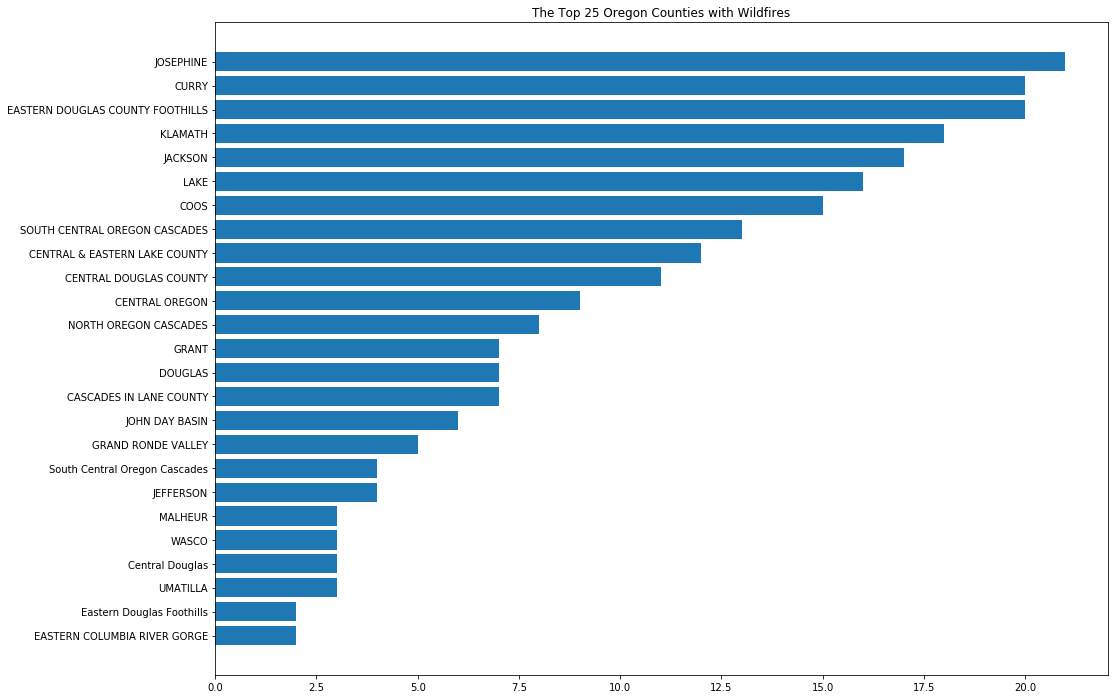

In [86]:
oregon_counties = wildfire_df.loc[df['STATE']=='OREGON','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(oregon_counties.index[-25:], oregon_counties.values[-25:])
plt.title('The Top 25 Oregon Counties with Wildfires');

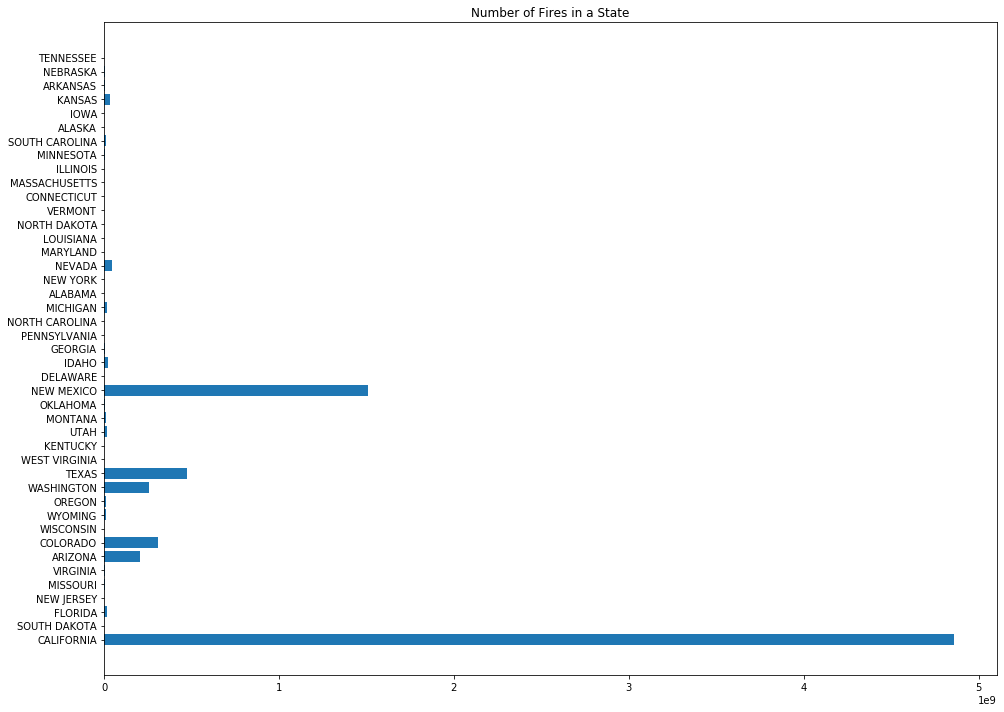

In [87]:
state_damage = wildfire_df.groupby('STATE', sort=False).sum()['DAMAGE_PROPERTY']

plt.figure(figsize=(16,12))
plt.barh(state_damage.index, state_damage.values)
plt.title('Number of Fires in a State');

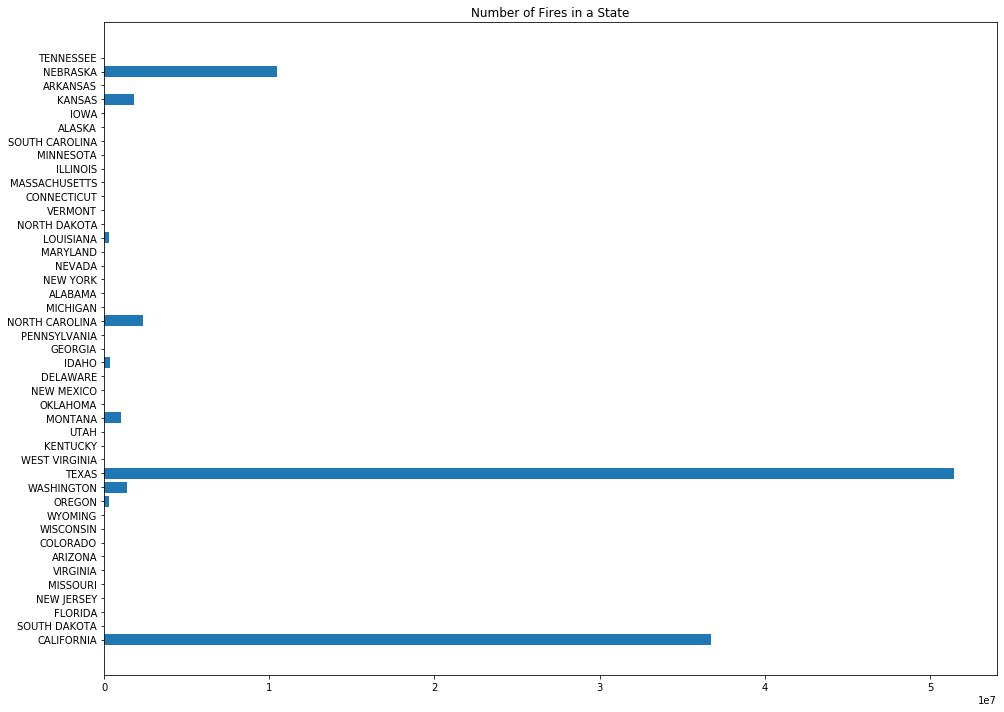

In [88]:
state_crop = wildfire_df.groupby('STATE', sort=False).sum()['DAMAGE_CROPS']

plt.figure(figsize=(16,12))
plt.barh(state_crop.index, state_crop.values)
plt.title('Number of Fires in a State');

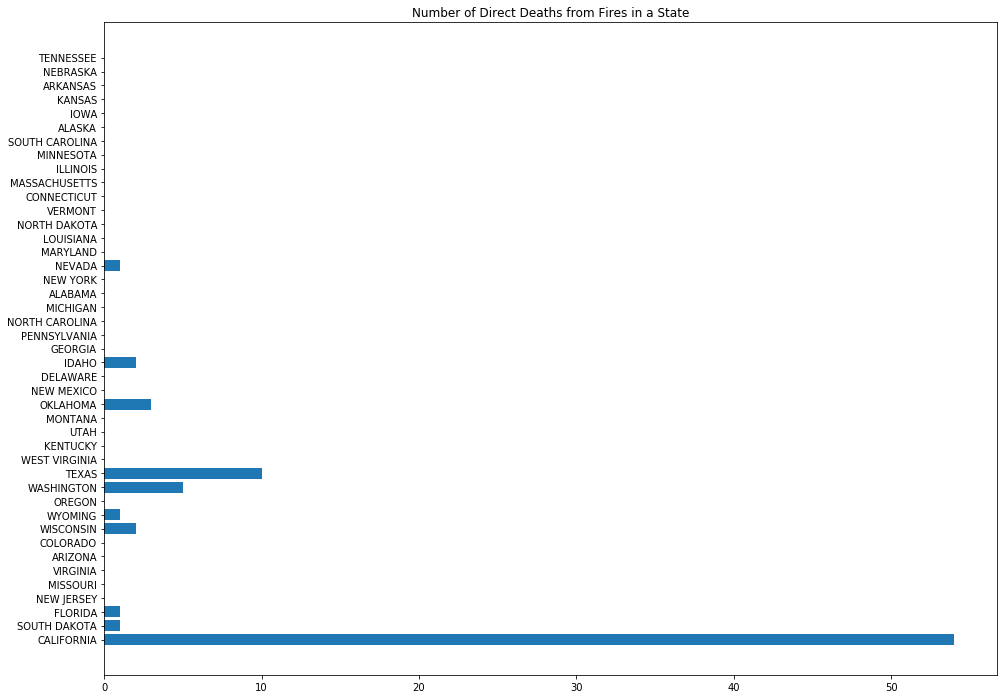

In [89]:
state_deaths_direct = wildfire_df.groupby('STATE', sort=False).sum()['DEATHS_DIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_deaths_direct.index, state_deaths_direct.values)
plt.title('Number of Direct Deaths from Fires in a State');

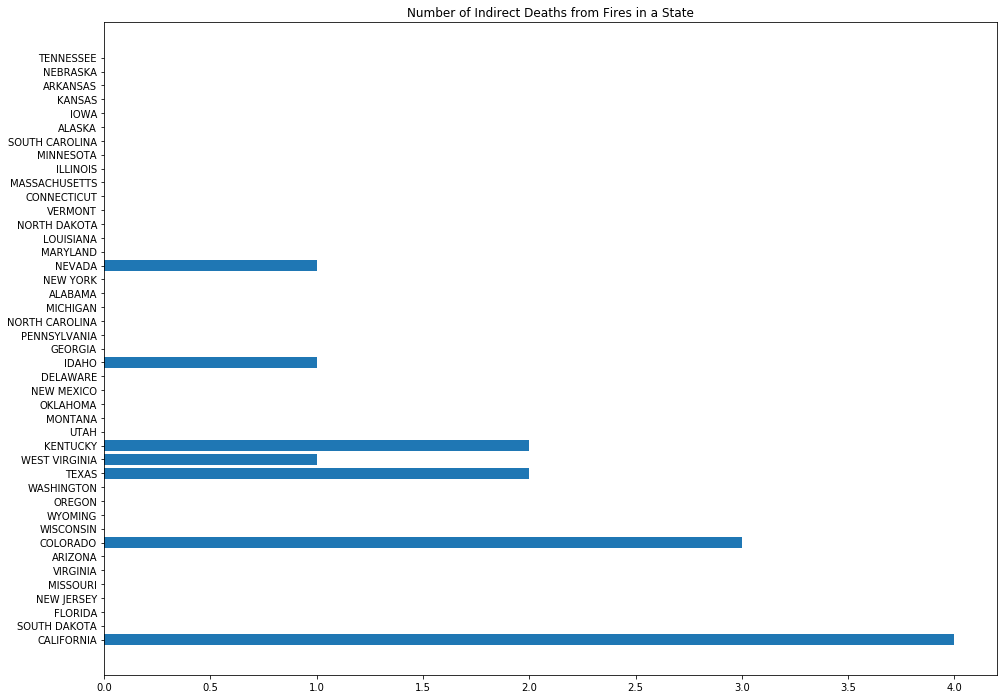

In [90]:
state_deaths_indirect = wildfire_df.groupby('STATE', sort=False).sum()['DEATHS_INDIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_deaths_indirect.index, state_deaths_indirect.values)
plt.title('Number of Indirect Deaths from Fires in a State');

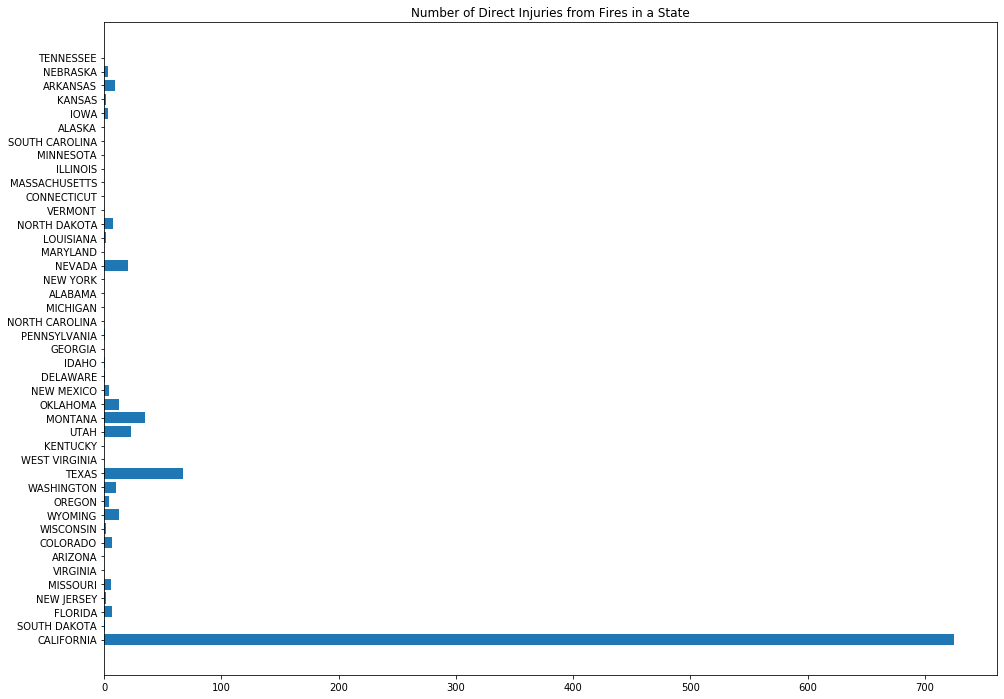

In [91]:
state_injuries_direct = wildfire_df.groupby('STATE', sort=False).sum()['INJURIES_DIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_injuries_direct.index, state_injuries_direct.values)
plt.title('Number of Direct Injuries from Fires in a State');

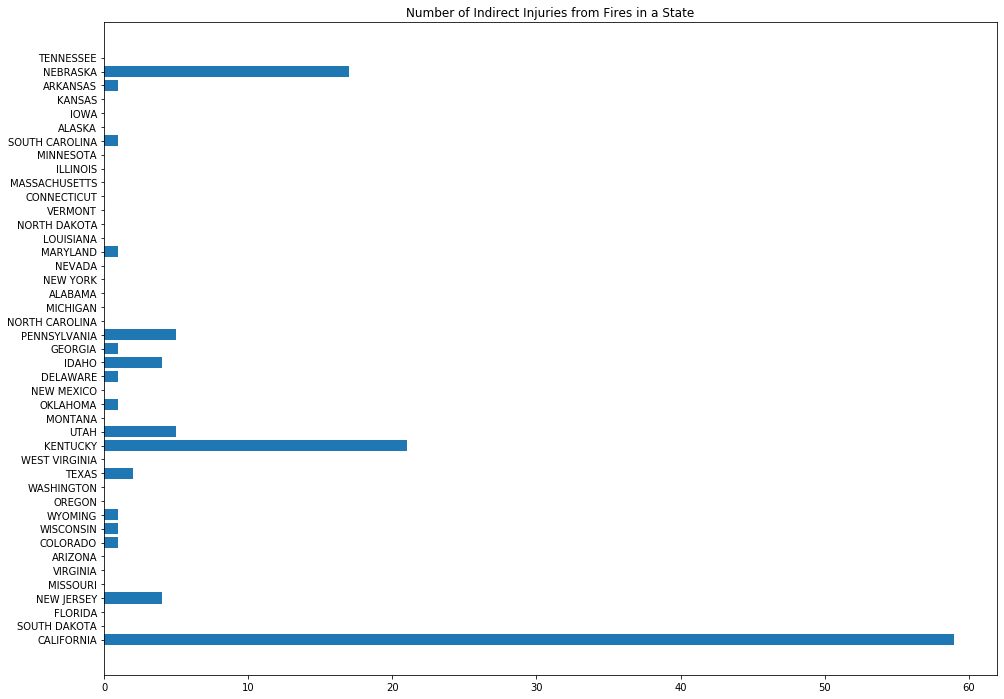

In [92]:
state_injuries_indirect = wildfire_df.groupby('STATE', sort=False).sum()['INJURIES_INDIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_injuries_indirect.index, state_injuries_indirect.values)
plt.title('Number of Indirect Injuries from Fires in a State');

# Drought data

In [93]:
drought_df = df[df['EVENT_TYPE']=='drought'].copy()

In [94]:
drought_df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH',
       'TOR_WIDTH', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS',
       'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION',
       'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON',
       'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'fips',
       'latitude', 'longitude'],
      dtype='object')

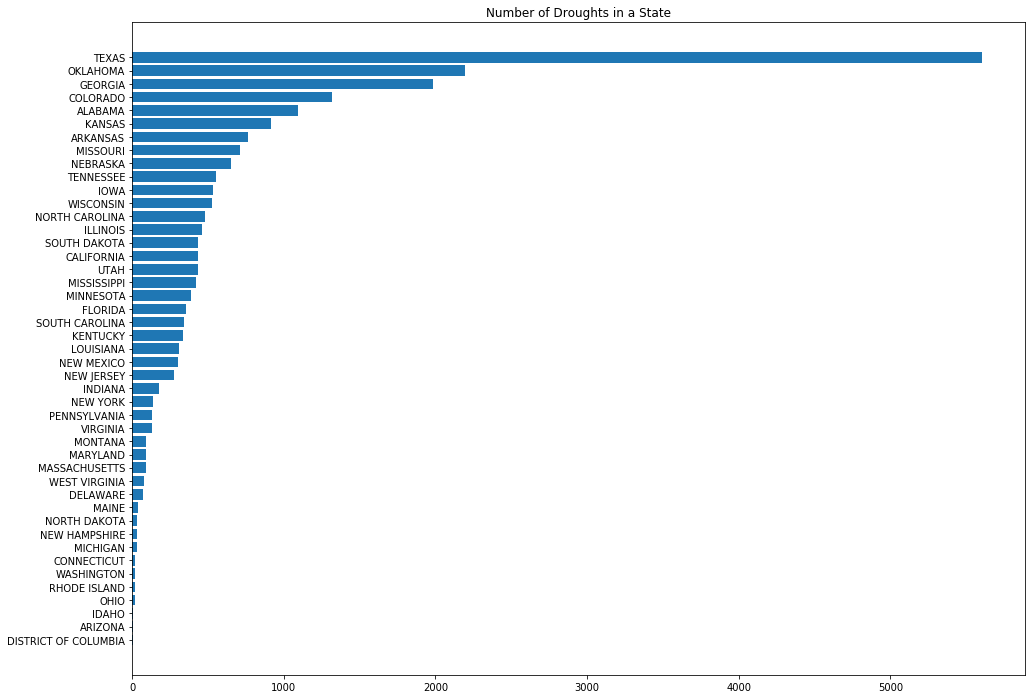

In [95]:
states_drough = drought_df['STATE'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(states_drough.index, states_drough.values)
plt.title('Number of Droughts in a State');

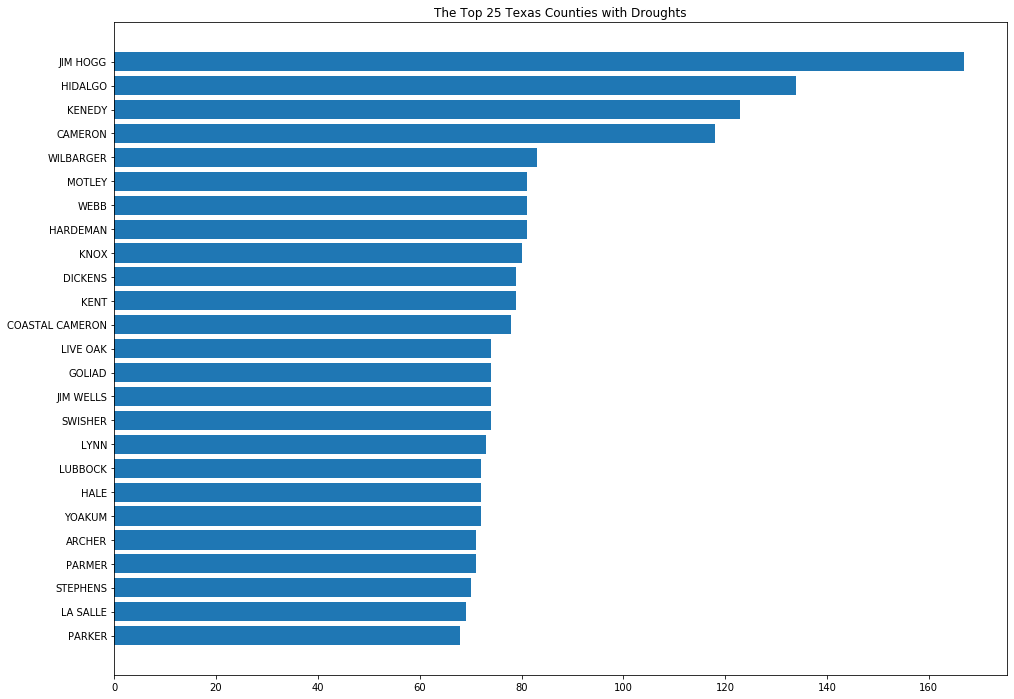

In [96]:
texas_counties_drought = drought_df.loc[df['STATE']=='TEXAS','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(texas_counties_drought.index[-25:], texas_counties_drought.values[-25:])
plt.title('The Top 25 Texas Counties with Droughts');

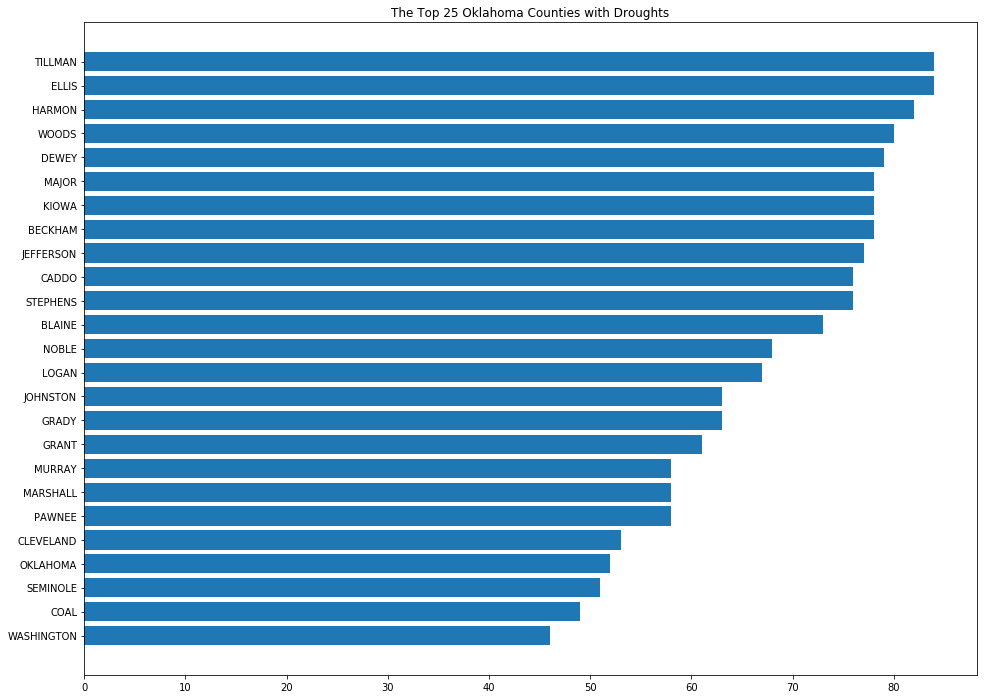

In [97]:
oklahoma_counties_drought = drought_df.loc[df['STATE']=='OKLAHOMA','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(oklahoma_counties_drought.index[-25:], oklahoma_counties_drought.values[-25:])
plt.title('The Top 25 Oklahoma Counties with Droughts');

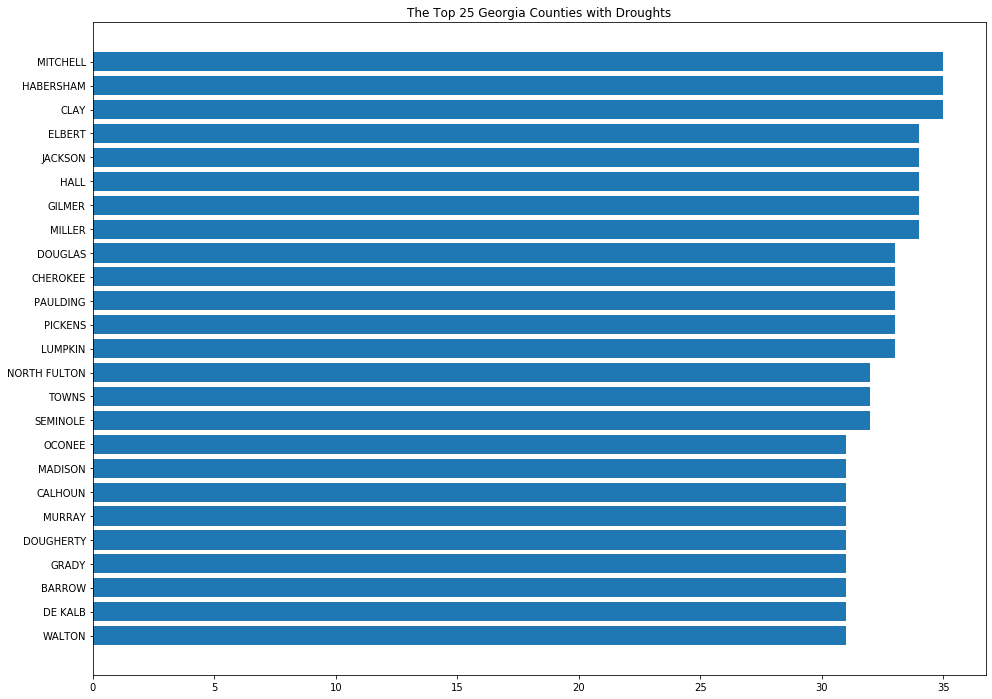

In [98]:
georgia_counties_drought = drought_df.loc[df['STATE']=='GEORGIA','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(georgia_counties_drought.index[-25:], georgia_counties_drought.values[-25:])
plt.title('The Top 25 Georgia Counties with Droughts');

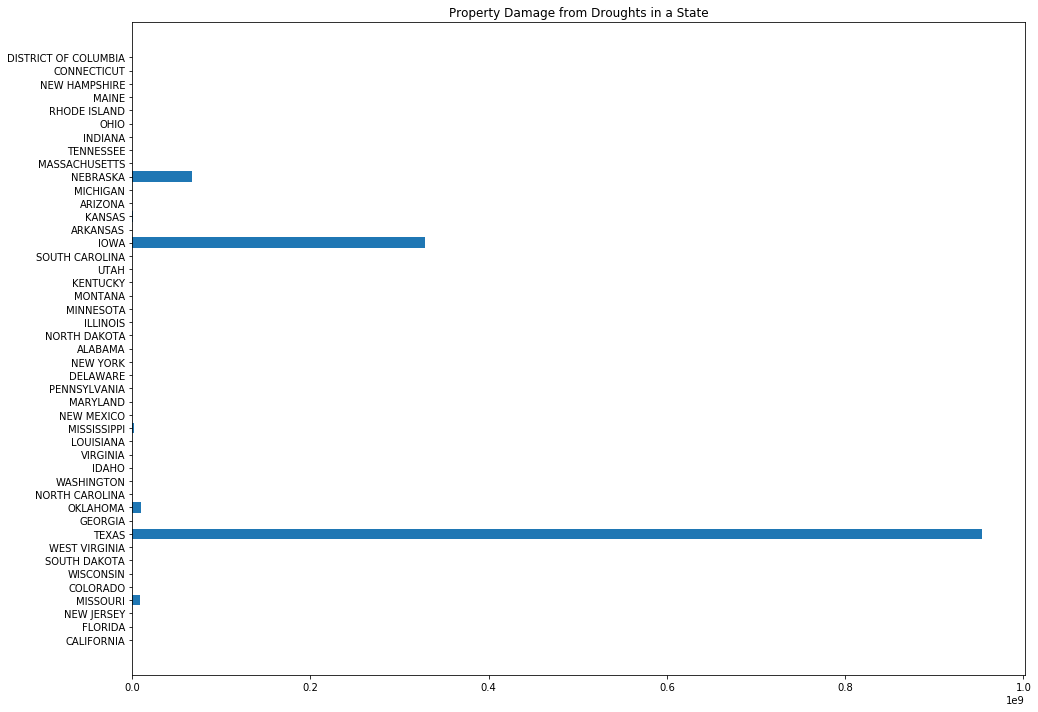

In [99]:
state_damage_drought = drought_df.groupby('STATE', sort=False).sum()['DAMAGE_PROPERTY']

plt.figure(figsize=(16,12))
plt.barh(state_damage_drought.index, state_damage_drought.values)
plt.title('Property Damage from Droughts in a State');

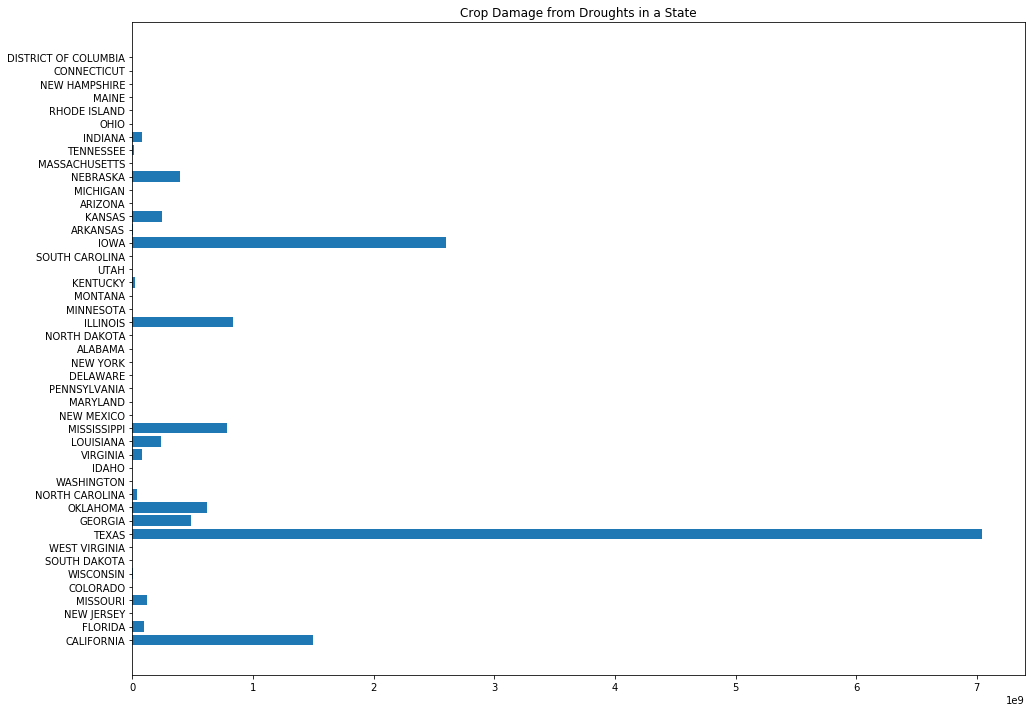

In [100]:
state_crop_damage_drought = drought_df.groupby('STATE', sort=False).sum()['DAMAGE_CROPS']

plt.figure(figsize=(16,12))
plt.barh(state_crop_damage_drought.index, state_crop_damage_drought.values)
plt.title('Crop Damage from Droughts in a State');

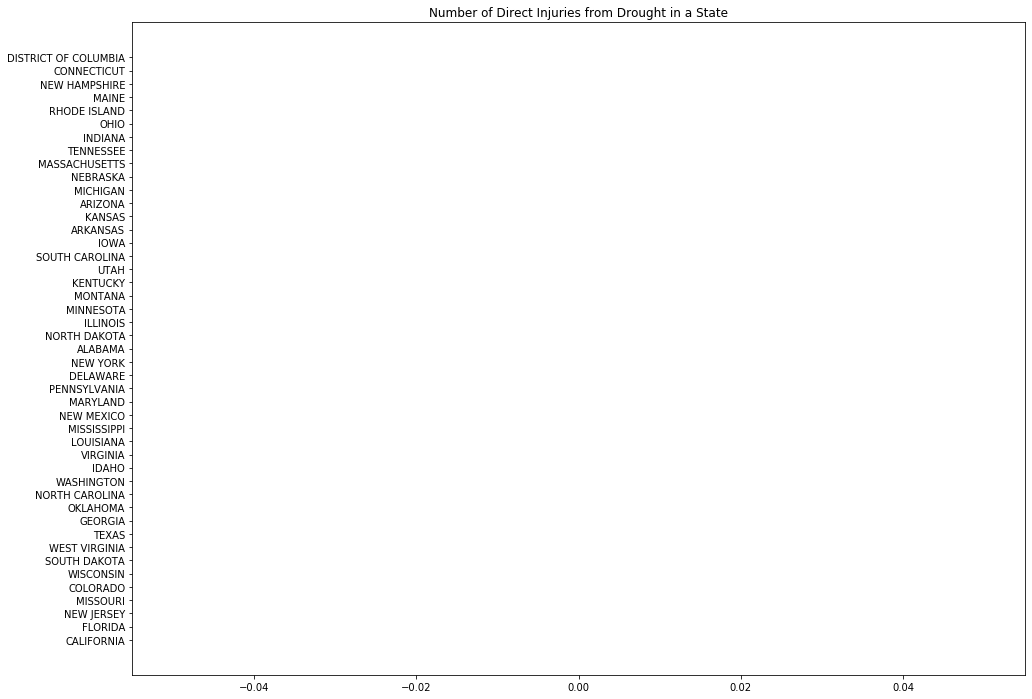

In [101]:
state_injuries_direct_droughts = drought_df.groupby('STATE', sort=False).sum()['INJURIES_DIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_injuries_direct_droughts.index, state_injuries_direct_droughts.values)
plt.title('Number of Direct Injuries from Drought in a State');

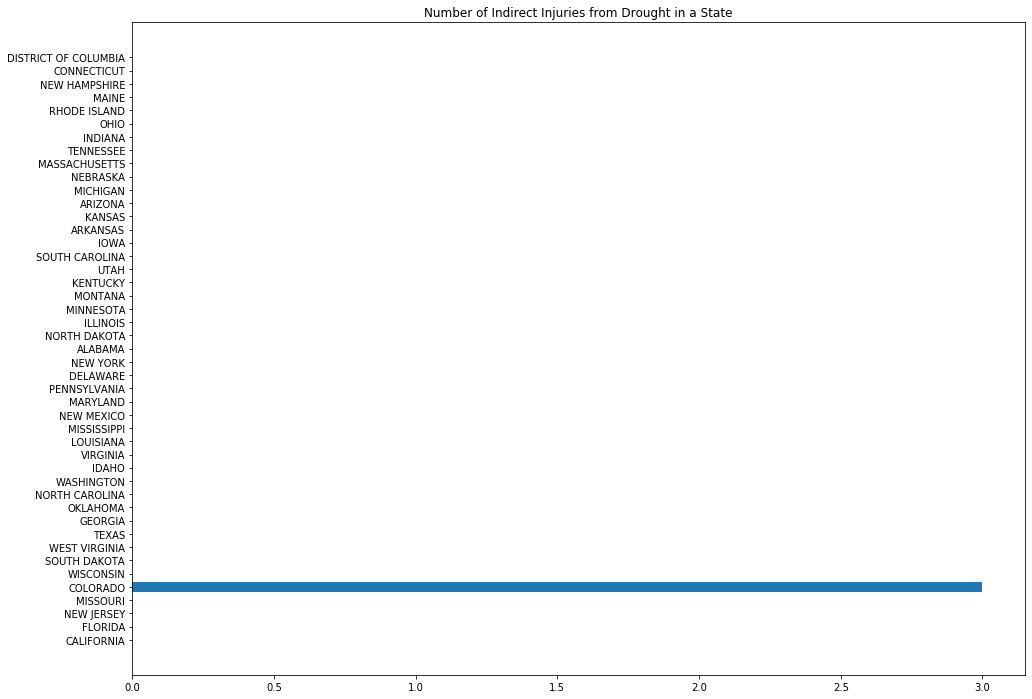

In [102]:
state_injuries_indirect_droughts = drought_df.groupby('STATE', sort=False).sum()['INJURIES_INDIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_injuries_indirect_droughts.index, state_injuries_indirect_droughts.values)
plt.title('Number of Indirect Injuries from Drought in a State');

# Hurricane data

In [103]:
hurricane_df = df[df['EVENT_TYPE']=='hurricane'].copy()

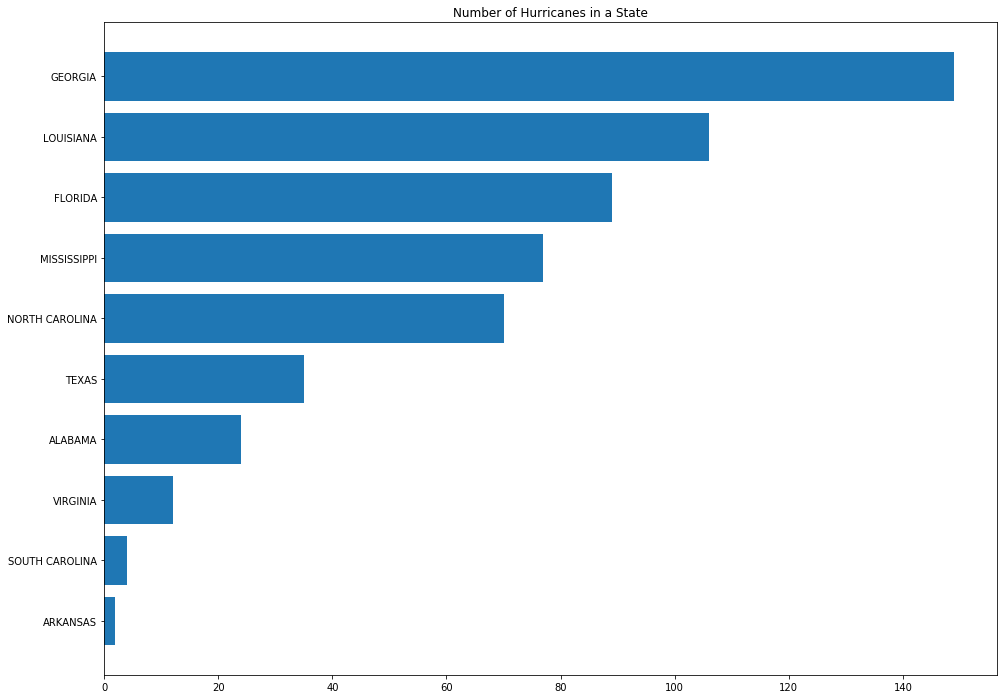

In [104]:
states_hurricane = hurricane_df['STATE'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(states_hurricane.index, states_hurricane.values)
plt.title('Number of Hurricanes in a State');

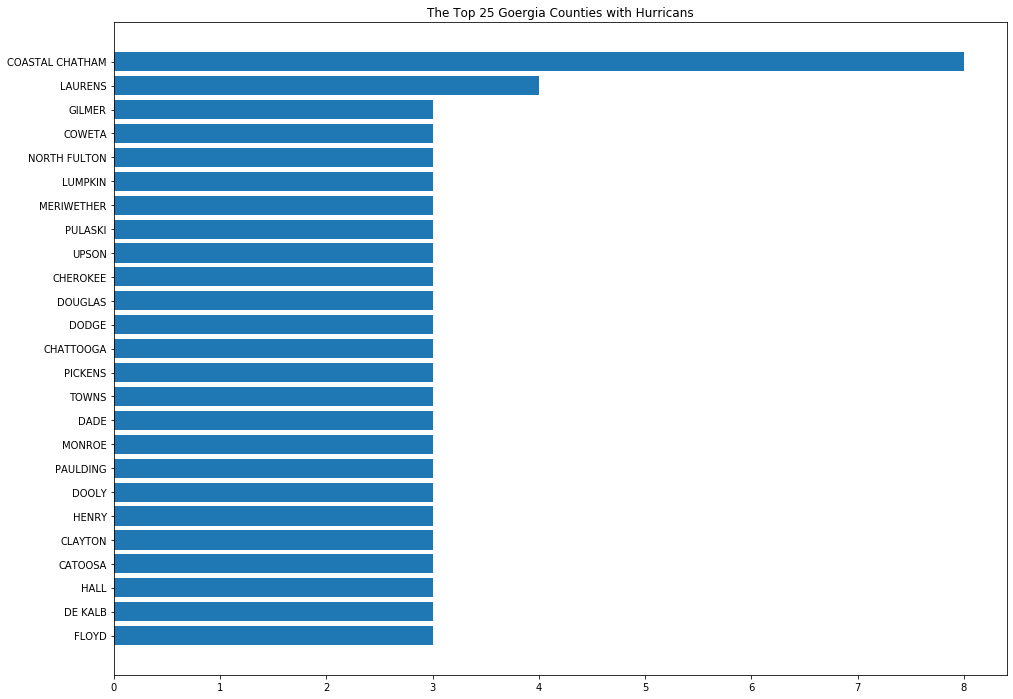

In [105]:
georgia_counties_hurricane = hurricane_df.loc[df['STATE']=='GEORGIA','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(georgia_counties_hurricane.index[-25:], georgia_counties_hurricane.values[-25:])
plt.title('The Top 25 Goergia Counties with Hurricans');

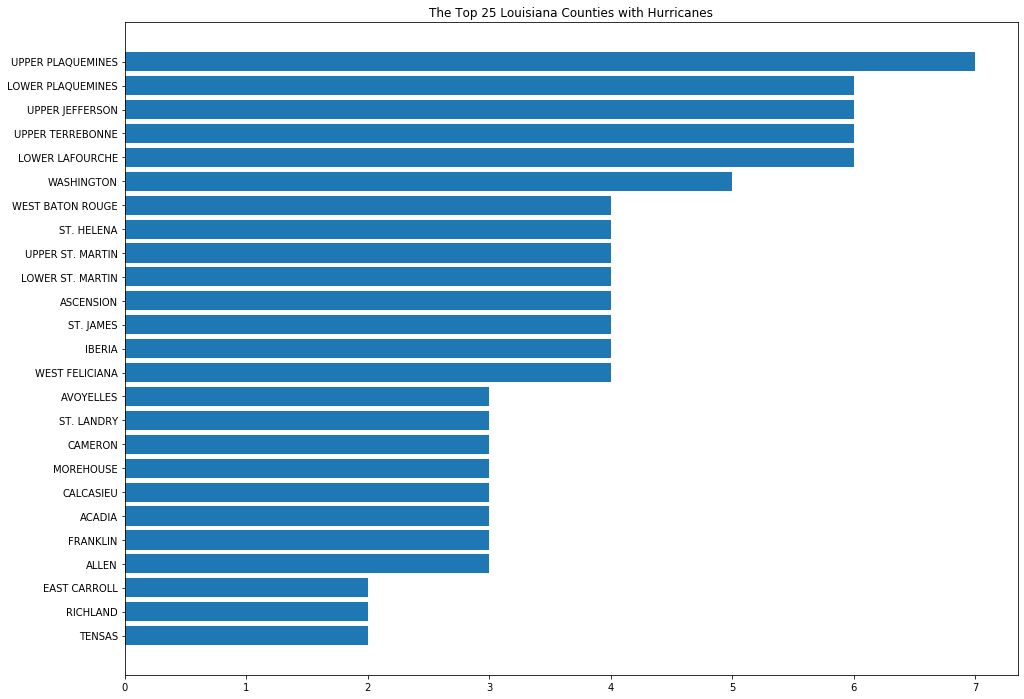

In [106]:
louisiana_counties_drought = hurricane_df.loc[df['STATE']=='LOUISIANA','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(louisiana_counties_drought.index[-25:], louisiana_counties_drought.values[-25:])
plt.title('The Top 25 Louisiana Counties with Hurricanes');

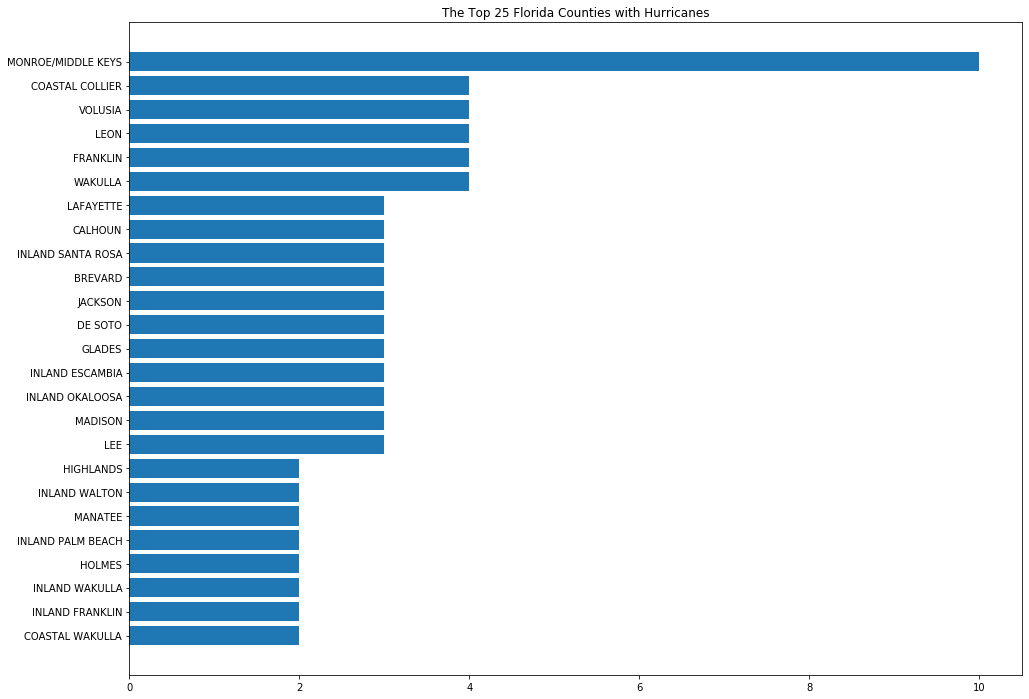

In [107]:
florida_counties_hurricane = hurricane_df.loc[df['STATE']=='FLORIDA','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(florida_counties_hurricane.index[-25:], florida_counties_hurricane.values[-25:])
plt.title('The Top 25 Florida Counties with Hurricanes');

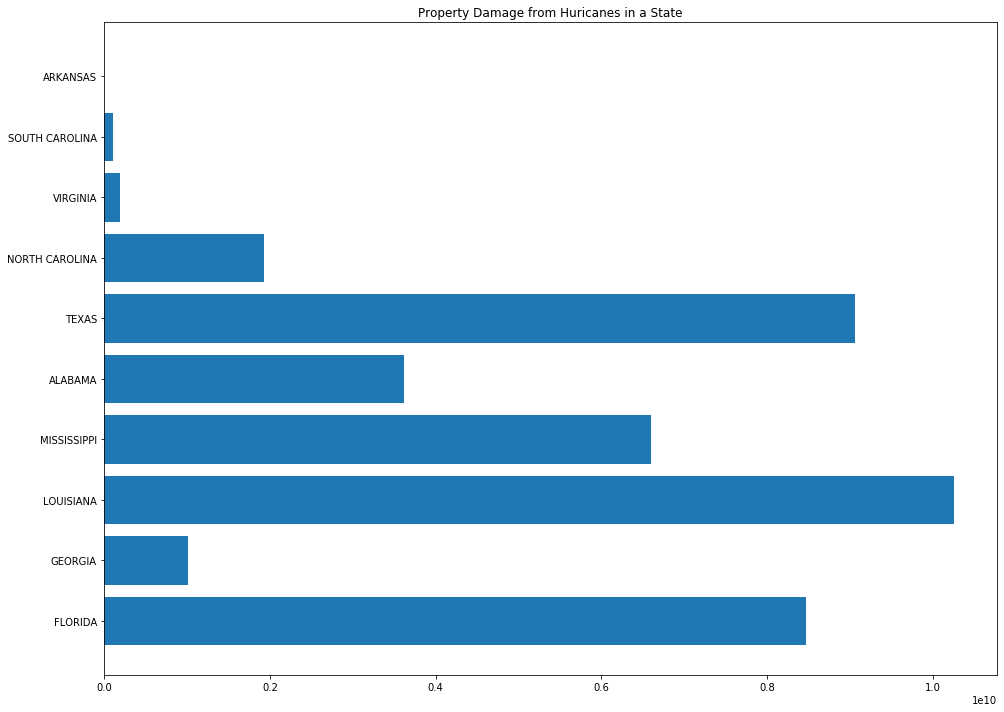

In [108]:
state_damage_hurricane = hurricane_df.groupby('STATE', sort=False).sum()['DAMAGE_PROPERTY']

plt.figure(figsize=(16,12))
plt.barh(state_damage_hurricane.index, state_damage_hurricane.values)
plt.title('Property Damage from Huricanes in a State');

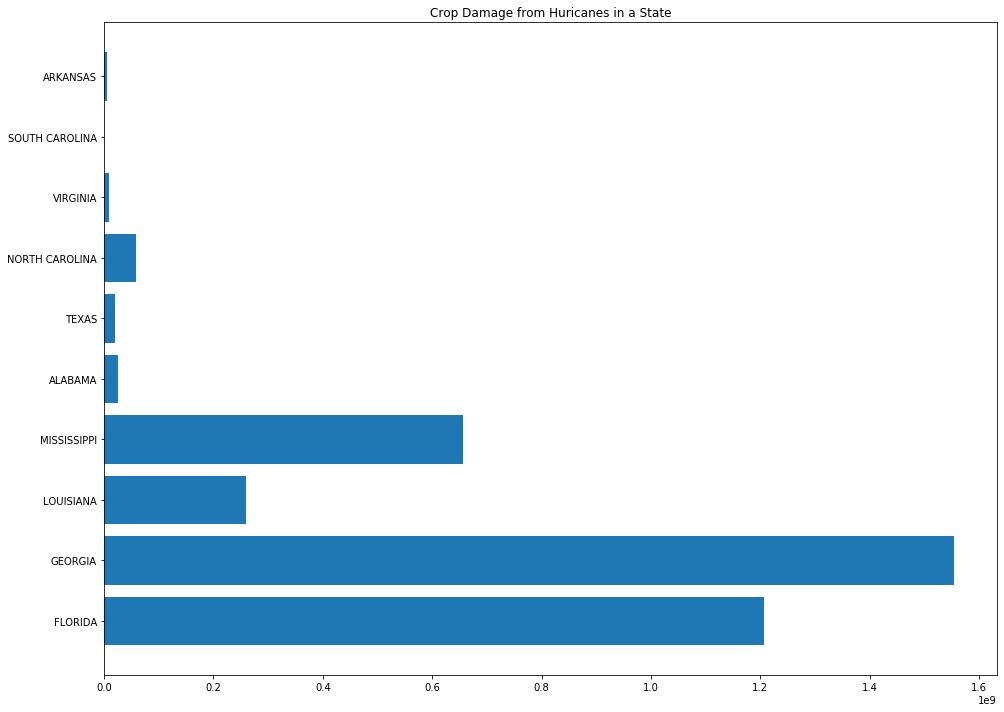

In [109]:
state_crop_damage_hurricane = hurricane_df.groupby('STATE', sort=False).sum()['DAMAGE_CROPS']

plt.figure(figsize=(16,12))
plt.barh(state_crop_damage_hurricane.index, state_crop_damage_hurricane.values)
plt.title('Crop Damage from Huricanes in a State');

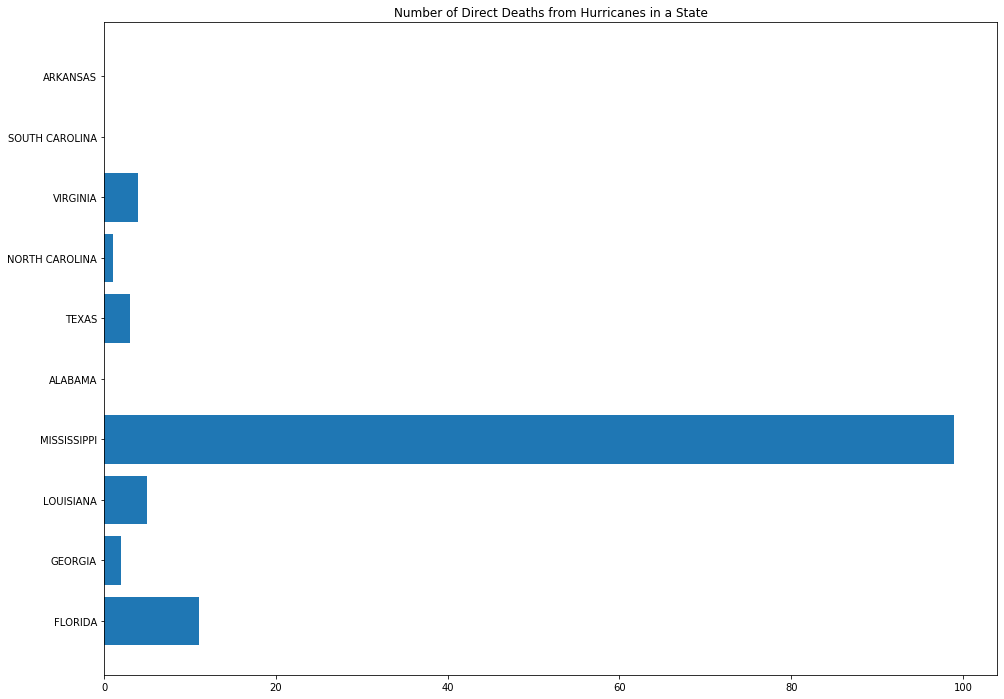

In [110]:
state_deaths_direct_hurricane = hurricane_df.groupby('STATE', sort=False).sum()['DEATHS_DIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_deaths_direct_hurricane.index, state_deaths_direct_hurricane.values)
plt.title('Number of Direct Deaths from Hurricanes in a State');

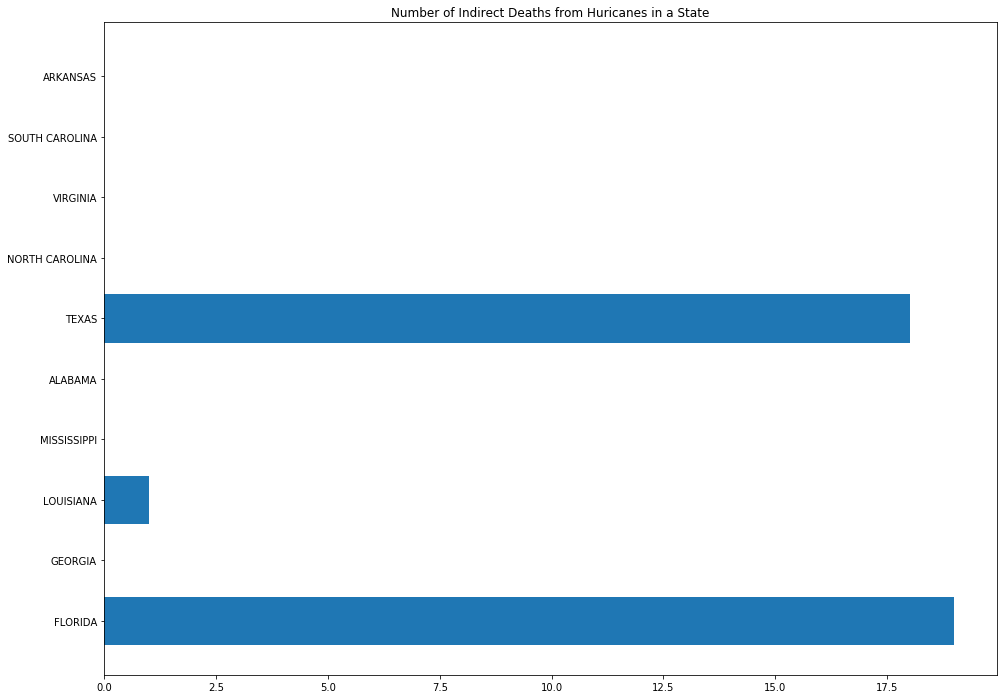

In [111]:
state_deaths_indirect_hurricanes = hurricane_df.groupby('STATE', sort=False).sum()['DEATHS_INDIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_deaths_indirect_hurricanes.index, state_deaths_indirect_hurricanes.values)
plt.title('Number of Indirect Deaths from Huricanes in a State');

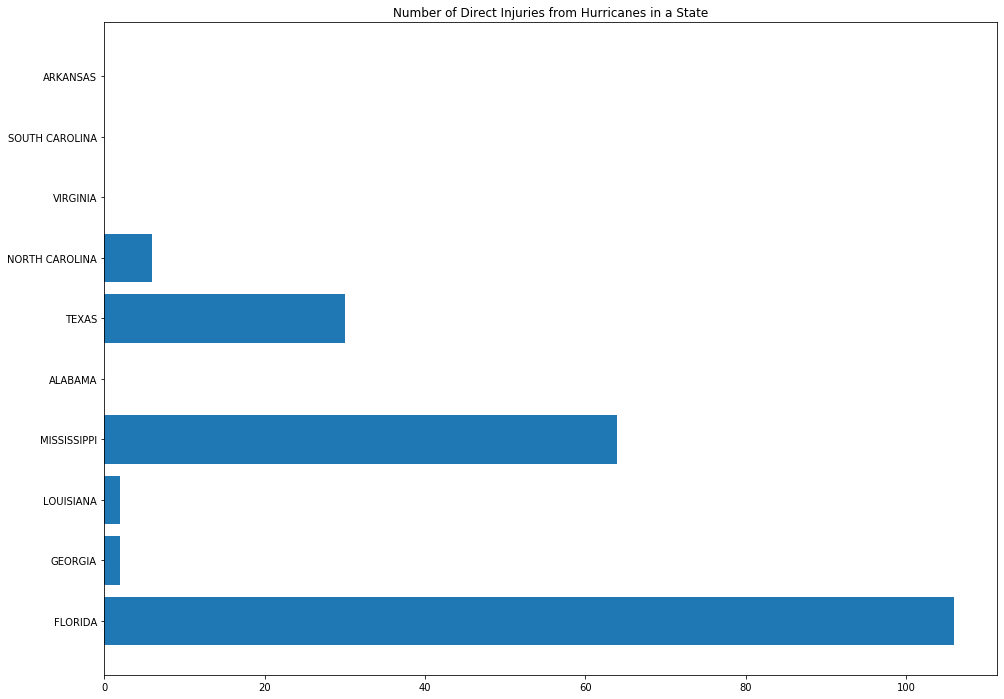

In [112]:
state_injuries_direct_hurricane = hurricane_df.groupby('STATE', sort=False).sum()['INJURIES_DIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_injuries_direct_hurricane.index, state_injuries_direct_hurricane.values)
plt.title('Number of Direct Injuries from Hurricanes in a State');

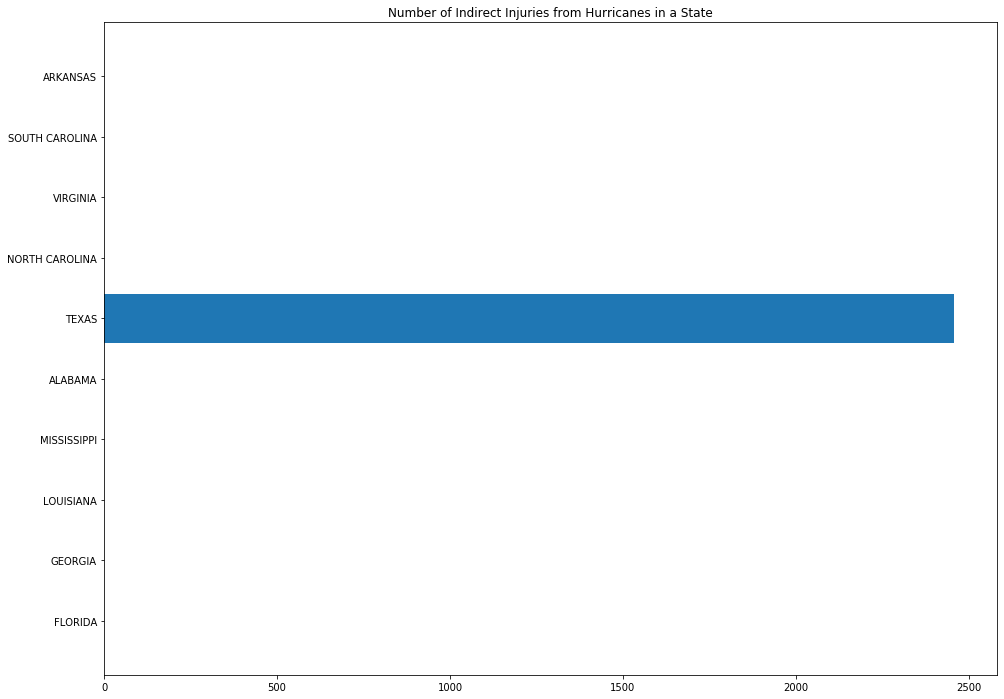

In [113]:
state_injuries_indirect_hurricane = hurricane_df.groupby('STATE', sort=False).sum()['INJURIES_INDIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_injuries_indirect_hurricane.index, state_injuries_indirect_hurricane.values)
plt.title('Number of Indirect Injuries from Hurricanes in a State');

# Tornado data

In [114]:
tornado_df = df[df['EVENT_TYPE']=='tornado'].copy()

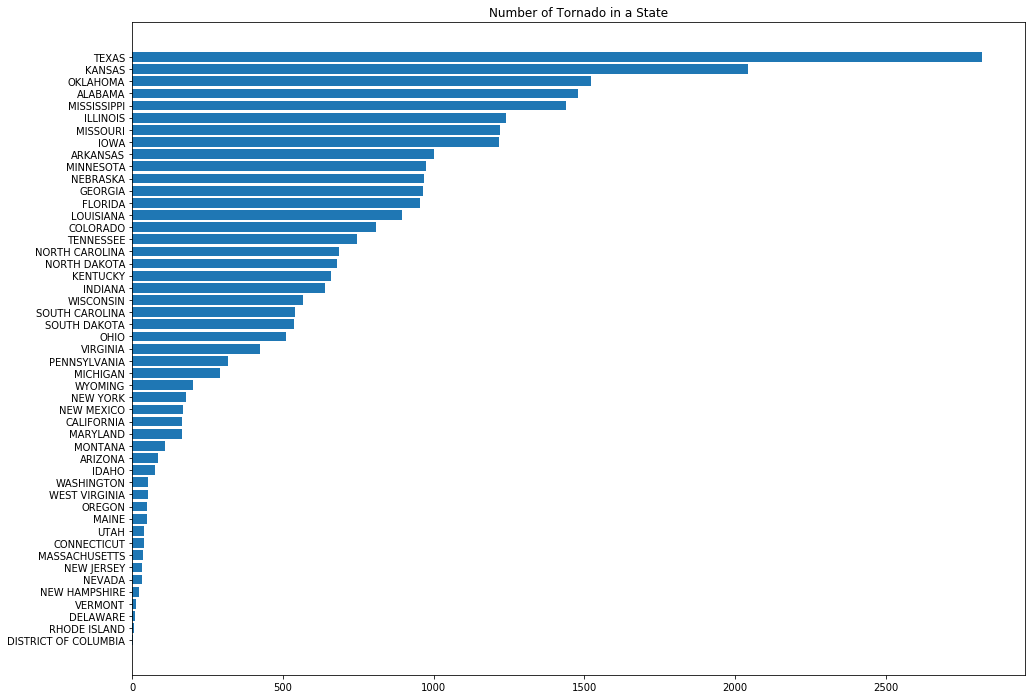

In [115]:
states_torando = tornado_df['STATE'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(states_torando.index, states_torando.values)
plt.title('Number of Tornado in a State');

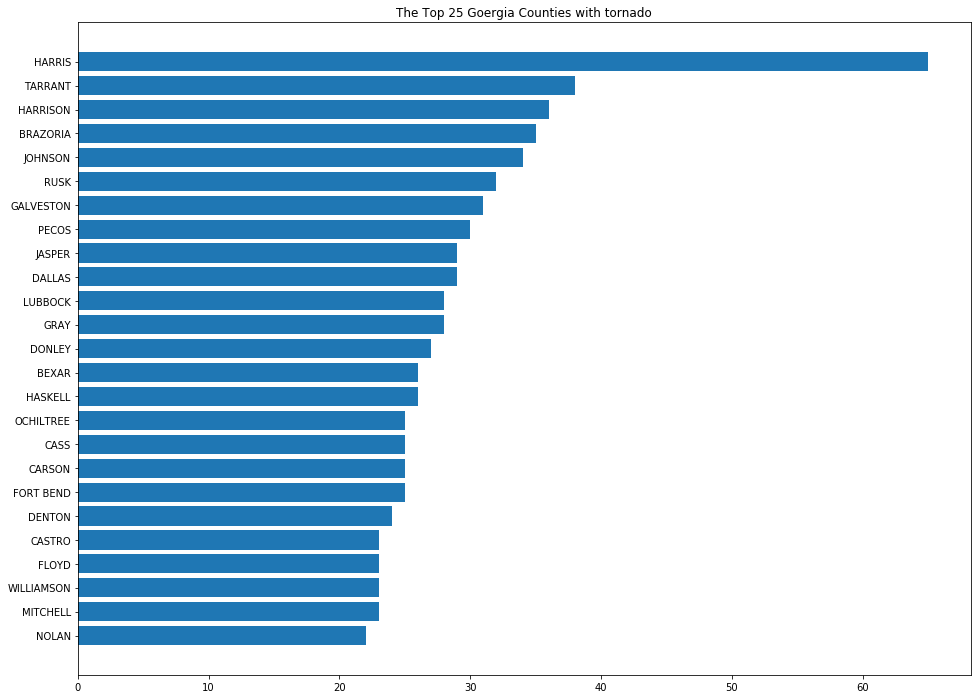

In [116]:
texas_counties_tornado = tornado_df.loc[df['STATE']=='TEXAS','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(texas_counties_tornado.index[-25:], texas_counties_tornado.values[-25:])
plt.title('The Top 25 Goergia Counties with tornado');

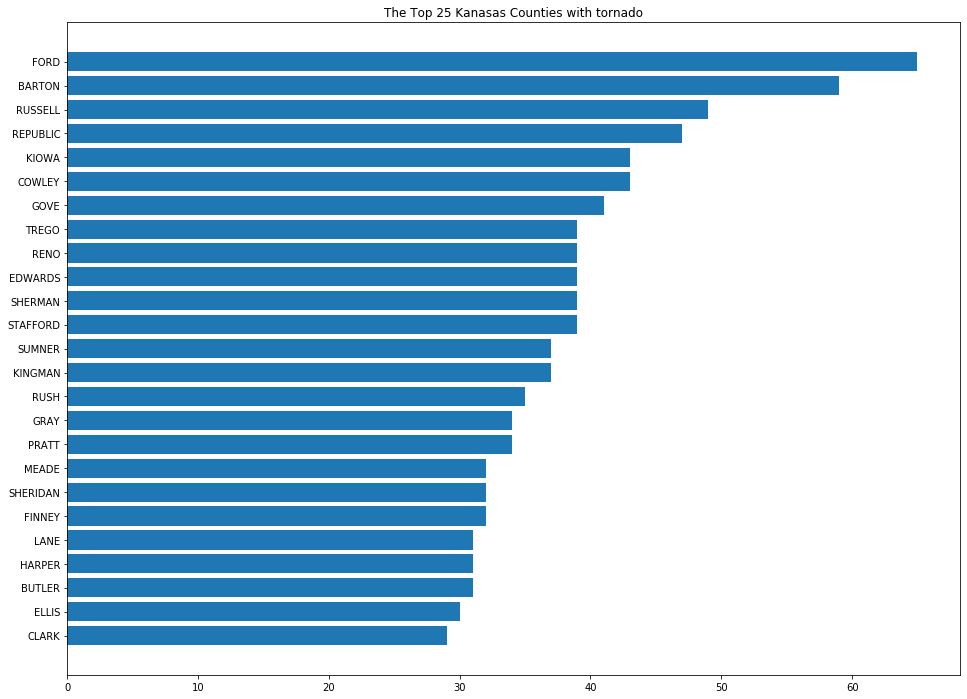

In [117]:
kansas_counties_tornado = tornado_df.loc[df['STATE']=='KANSAS','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(kansas_counties_tornado.index[-25:], kansas_counties_tornado.values[-25:])
plt.title('The Top 25 Kanasas Counties with tornado');

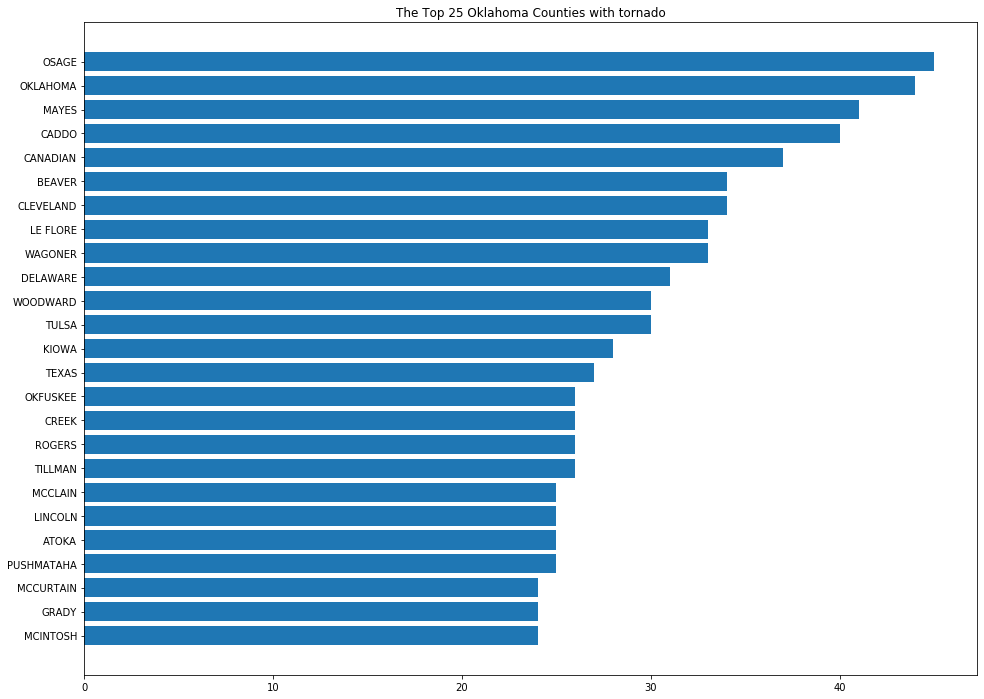

In [118]:
oklahoma_counties_tornado = tornado_df.loc[df['STATE']=='OKLAHOMA','CZ_NAME'].value_counts().sort_values()

plt.figure(figsize=(16,12))
plt.barh(oklahoma_counties_tornado.index[-25:], oklahoma_counties_tornado.values[-25:])
plt.title('The Top 25 Oklahoma Counties with tornado');

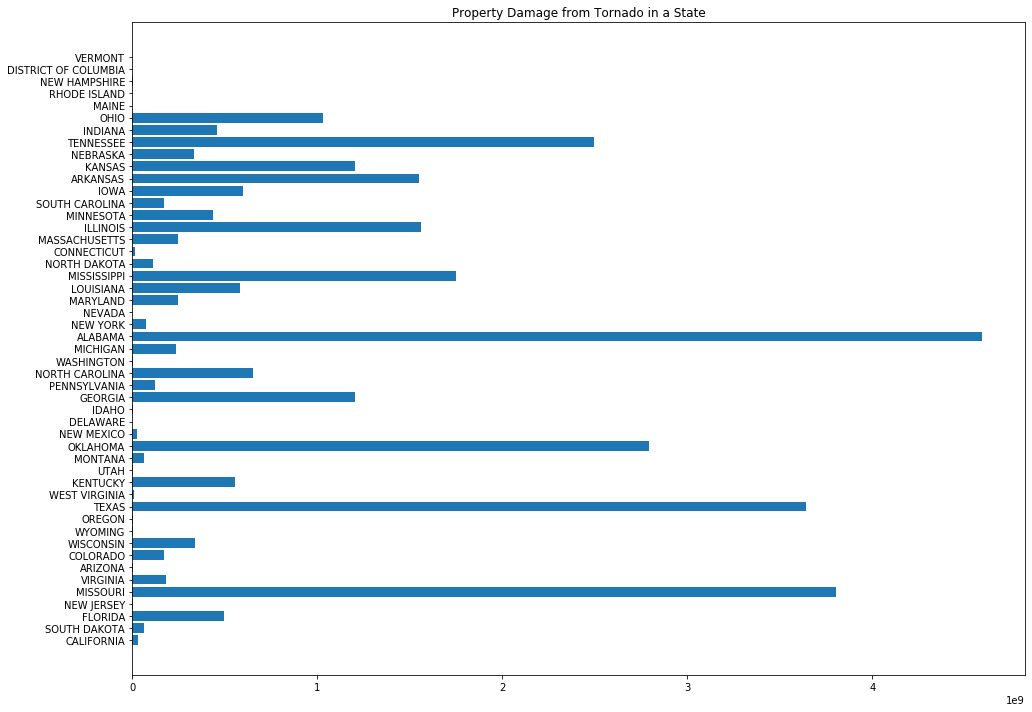

In [119]:
state_damage_tornado = tornado_df.groupby('STATE', sort=False).sum()['DAMAGE_PROPERTY']

plt.figure(figsize=(16,12))
plt.barh(state_damage_tornado.index, state_damage_tornado.values)
plt.title('Property Damage from Tornado in a State');

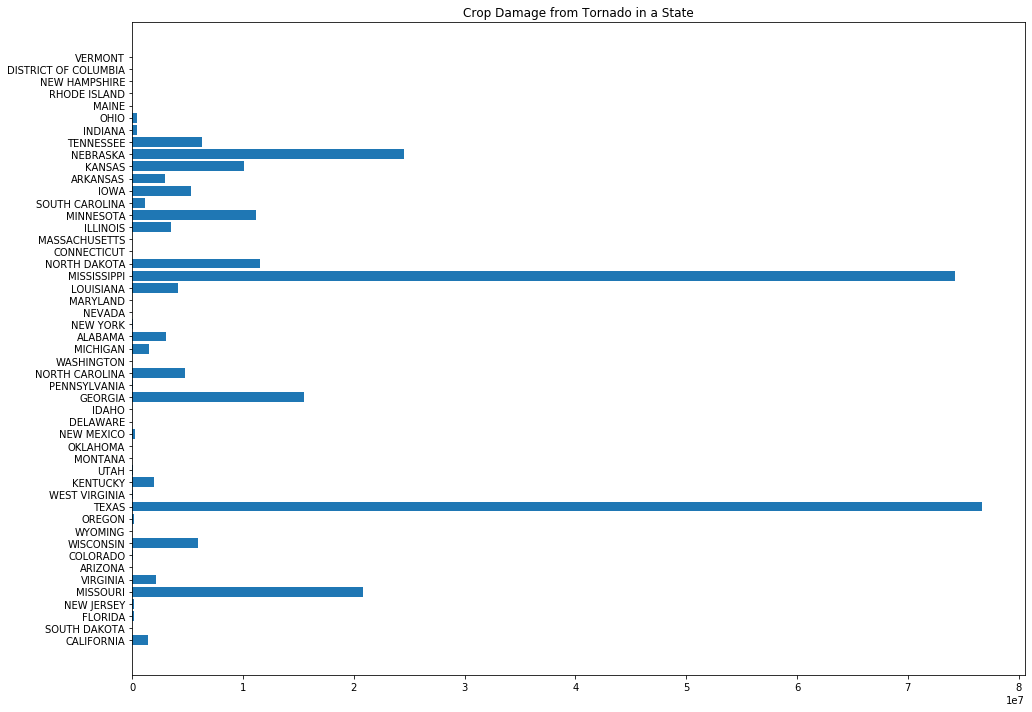

In [120]:
state_crop_damage_tornado = tornado_df.groupby('STATE', sort=False).sum()['DAMAGE_CROPS']

plt.figure(figsize=(16,12))
plt.barh(state_crop_damage_tornado.index, state_crop_damage_tornado.values)
plt.title('Crop Damage from Tornado in a State');

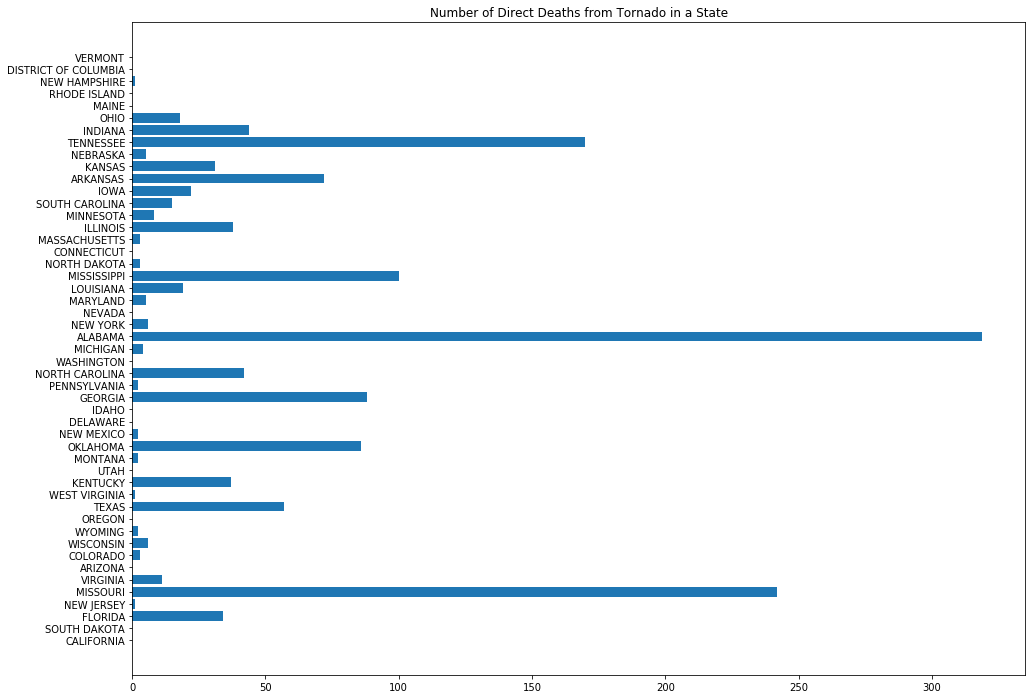

In [121]:
state_deaths_direct_tornado = tornado_df.groupby('STATE', sort=False).sum()['DEATHS_DIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_deaths_direct_tornado.index, state_deaths_direct_tornado.values)
plt.title('Number of Direct Deaths from Tornado in a State');

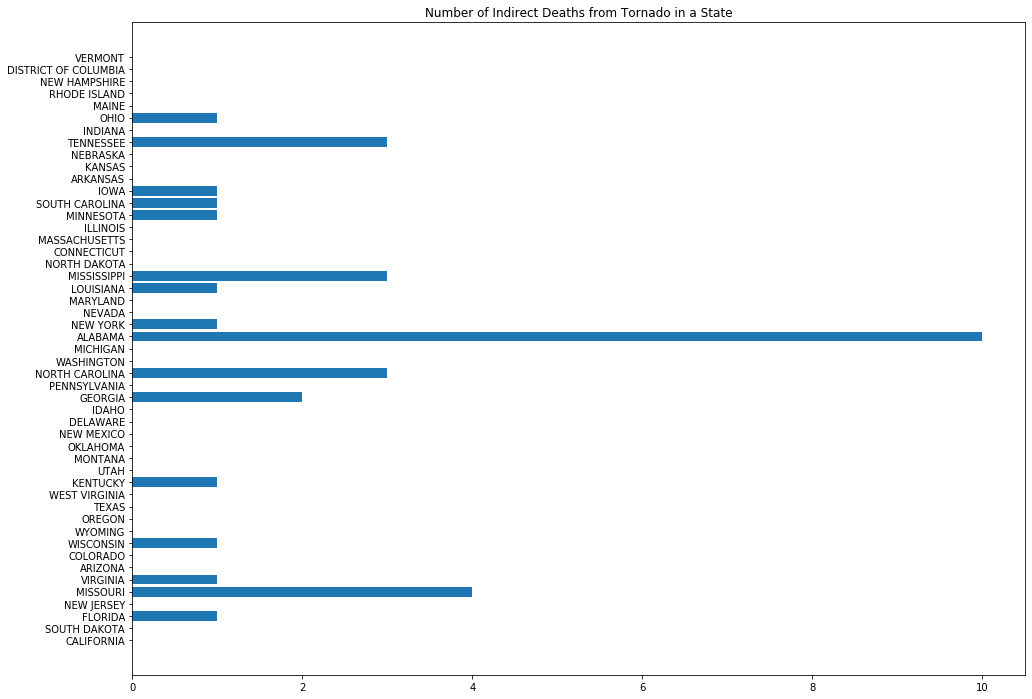

In [122]:
state_deaths_indirect_tornado = tornado_df.groupby('STATE', sort=False).sum()['DEATHS_INDIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_deaths_indirect_tornado.index, state_deaths_indirect_tornado.values)
plt.title('Number of Indirect Deaths from Tornado in a State');

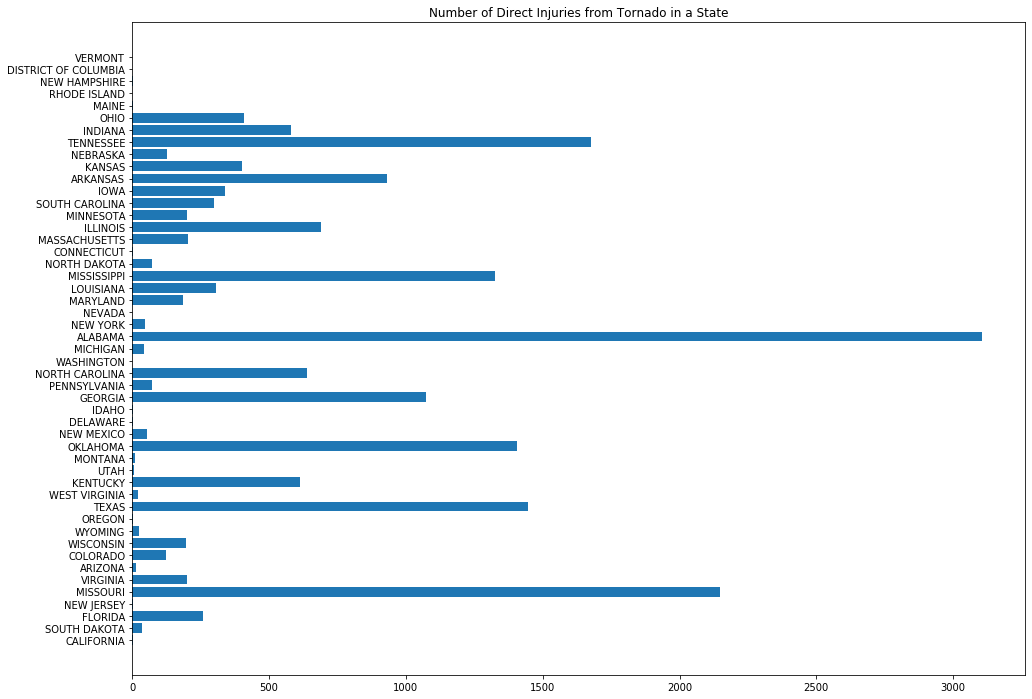

In [123]:
state_injuries_direct_tornado = tornado_df.groupby('STATE', sort=False).sum()['INJURIES_DIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_injuries_direct_tornado.index, state_injuries_direct_tornado.values)
plt.title('Number of Direct Injuries from Tornado in a State');

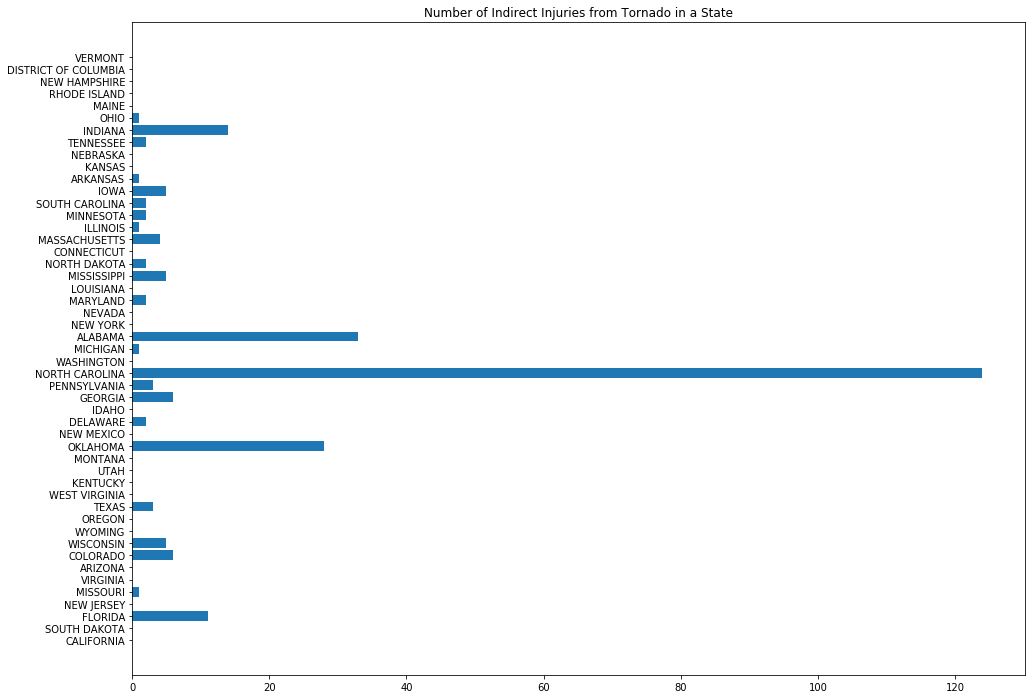

In [124]:
state_injuries_indirect_tornado = tornado_df.groupby('STATE', sort=False).sum()['INJURIES_INDIRECT']

plt.figure(figsize=(16,12))
plt.barh(state_injuries_indirect_tornado.index, state_injuries_indirect_tornado.values)
plt.title('Number of Indirect Injuries from Tornado in a State');

# Pushing data

In [142]:
wildfire_df.to_csv('../data/weather_data/wildfire.csv', index = False) 

In [143]:
hurricane_df.to_csv('../data/weather_data/hurricane.csv', index = False) 

In [144]:
tornado_df.to_csv('../data/weather_data/tornado.csv', index = False) 

In [145]:
drought_df.to_csv('../data/weather_data/drought.csv', index = False) 

# US Map

In [127]:
county_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us_counties_20m_topo.json'

In [125]:
US_map = folium.Map(location = [37, -96],
                    zoom_start=4.9,
                    zoom_control=False,
                    scrollWheelZoom=False,
                    dragging=False
                   )

In [141]:
wildfire_df.groupby('fips').count()[['EVENT_TYPE']]

,EVENT_TYPE
fips,
1001,1
1003,2
1099,1
2020,1
4001,1
...,...
56029,10
56035,1
56037,5


In [ ]:
choropleth 

In [ ]:
folium.Choropleth()

In [126]:
US_map 